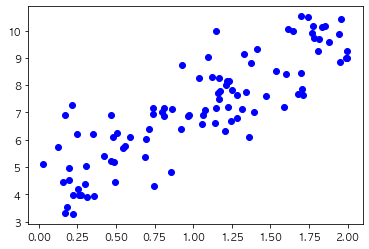

In [69]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#선형처럼 보이는 데이터 생성
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

#데이터 시각화
plt.scatter(X,y,c='b')

### 1. 선형회귀

In [156]:
#모든 샘플에 x0=1을 추가하기
X_b = np.c_[np.ones((100,1)),X]
#normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[-3.81639165e-17],
       [ 8.57551286e-01]])

In [22]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] 
# 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict #특정 샘플의 예측값 출력

array([[ 4.06293519],
       [10.01302942]])

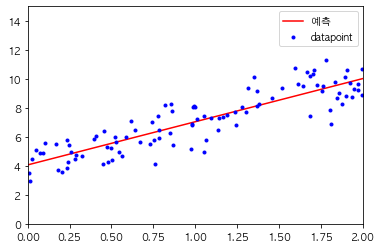

In [31]:
plt.plot(X_new, y_predict, 'r-', label='예측')
plt.plot(X,y,'b.', label='datapoint')
plt.axis([0,2,0,15])
plt.legend()
plt.show()

In [32]:
#사이킷런에서 직접 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [33]:
lin_reg.intercept_, lin_reg.coef_ 

(array([4.06293519]), array([[2.97504711]]))

In [34]:
lin_reg.predict(X_new)

array([[ 4.06293519],
       [10.01302942]])

In [35]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06293519],
       [2.97504711]])

In [36]:
residuals

array([96.25724287])

In [37]:
s

array([15.02733791,  4.07125768])

In [38]:
rank

2

### 2. 경사 하강법

In [155]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients


In [40]:
theta

array([[4.06293519],
       [2.97504711]])

Text(0, 0.5, 'y')

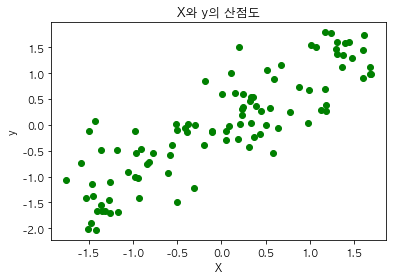

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X) #특성 스케일링
y = scaler.fit_transform(y)

plt.scatter(X,y,c='g')
plt.title('X와 y의 산점도')
plt.xlabel('X')
plt.ylabel('y')

In [158]:
#데이터와 회귀선을 같이 그리는 함수
def plot_prediction(pred,y):
    plt.figure(figsize=(3,2))
    plt.plot(X,y,'o',c='g',alpha=0.5)
    plt.plot(X,pred,c='r')
    plt.title('선형 회귀선')
    plt.show()

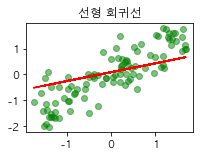

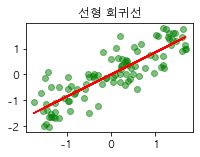

In [159]:
#경사하강법 구현
W = np.random.uniform(-1,1) #가중치 벡터 임의로 설정
b = np.random.uniform(-1,1) #편향
                
learning_rate = 0.7

for epoch in range(100):
    y_pred = W * X + b 
    error = np.abs(y_pred - y).mean()
    if error<0.001:
        break
    #gradient descent
    w_grad = learning_rate * ((y_pred-y)*X).mean()
    b_grad = learning_rate * (y_pred - y).mean()
    
    #가중치 벡터와 편향 갱신
    W = W-w_grad
    b = b-b_grad
    
    if epoch%5 ==0:
        y_pred = W * X + b
    if epoch in (0,99):
        plot_prediction(y_pred,y)

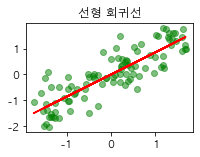

In [166]:
#itertaion이 너무 작을경우
W = np.random.uniform(-1,1) #가중치 벡터 임의로 설정
b = np.random.uniform(-1,1) #편향
                
learning_rate = 0.7

for epoch in range(10):
    y_pred = W * X + b 
    error = np.abs(y_pred - y).mean()
    if error<0.001:
        break
    #gradient descent
    w_grad = learning_rate * ((y_pred-y)*X).mean()
    b_grad = learning_rate * (y_pred - y).mean()
    
    #가중치 벡터와 편향 갱신
    W = W-w_grad
    b = b-b_grad
    if epoch == 9:
        y_pred = W * X + b
        plot_prediction(y_pred,y)

### SGD Classifier

In [181]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameter

def learning_schedule(t):
    return t0/(t+t1) #t 값이 커질수록 learning rate가 작아진다

theta = np.random.randn(2,1) #무작위 초기화

theta_path_sgd = []
m=len(X_b)
np.random.seed(42)


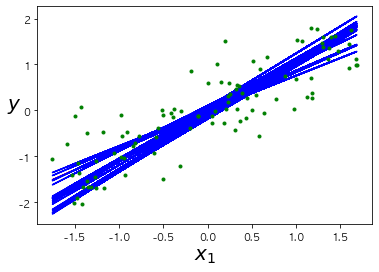

In [185]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict = X_b.dot(theta)
            style='b-' if i>0 else 'r-'
            plt.plot(X, y_predict, style)
        random_index = np.random.randint(m) #랜덤
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,'g.')
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$y$', rotation=0, fontsize=20)
plt.show()
    
